In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pathlib as plib
import sys

In [2]:
sys.path.append(".")
sys.path.append("../resources/results")
path = "../resources/results/"

In [20]:
def load(filename):
    df_raw = pd.read_csv(path + filename)
    partitions = np.array(df_raw.columns[1:])
    df = df_raw.copy()
    df[partitions] = df_raw[partitions]/1000
    df["num_cores"].astype('string') + " cores"
    return df, partitions
    

In [85]:
def plot_partitions(name, df, partitions, ax=None):
    if ax == None :
        _, ax = plt.subplots()
    for i in df["num_cores"]:
        ax.plot(partitions, (df[df["num_cores"]==i][partitions]).to_numpy().reshape((-1)))
    
    ax.set_title("Time of " + name + " w.r.t. number of partitions")
    ax.set_ylabel('Time [s]')
    ax.set_xlabel('Number of partitions');  
    # plt.gca().set_ylim(bottom=0)
    ax.legend((df["num_cores"].astype('string') + " cores").values);

def plot_cores(name, df, partitions, ax=None):
    if ax == None :
        _, ax = plt.subplots()
    for p in partitions:
        ax.plot(df["num_cores"], df[p])
    
    ax.set_title("Time of "+ name + " w.r.t. number of cores")
    ax.set_ylabel('Time [s]')
    ax.set_xlabel('Number of cores');
    # plt.gca().set_ylim(bottom=0)
    ax.legend(df.columns[1:] + " partitions");


def plot_result(name, date, df, partitions, save=False):
    fig, ax = plt.subplots(nrows= 1,ncols=2,figsize= (12,5), sharey = True, sharex = False) 
    plot_partitions(name, df, partitions, ax[0])
    plot_cores(name, df, partitions, ax[1])
    if save:
        plt.savefig(path + "plots/"+ name + date +'.png', dpi=80)
    plt.show()

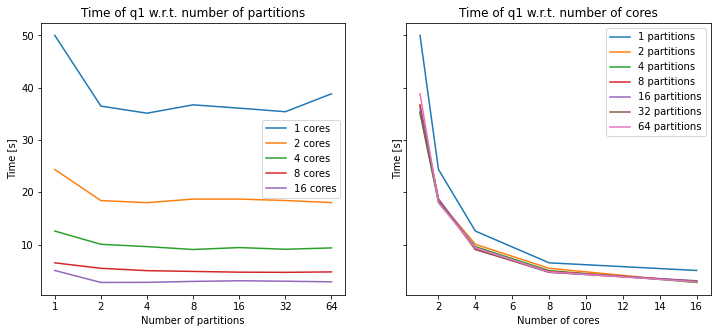

In [71]:
df, partitions = load(filename)
plot_result(name, date, df, partitions)

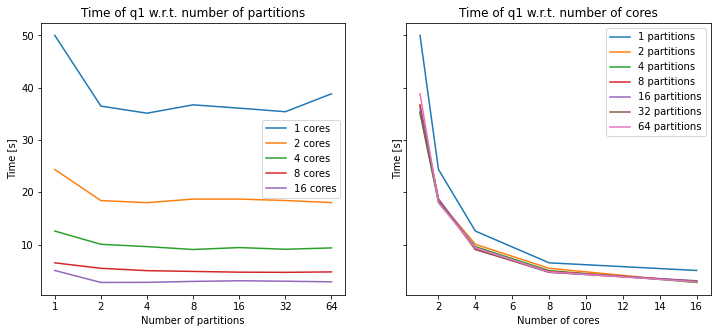

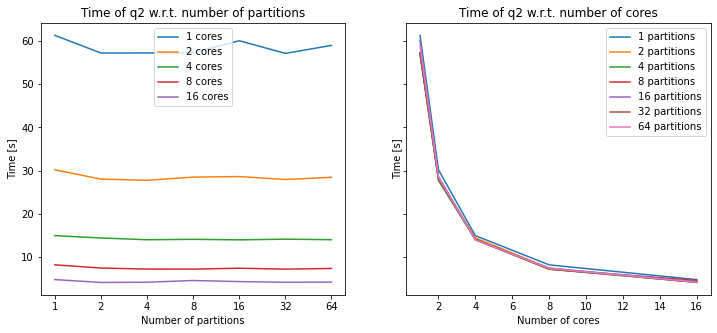

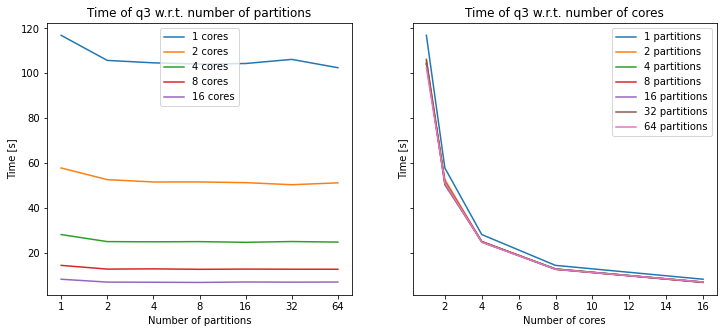

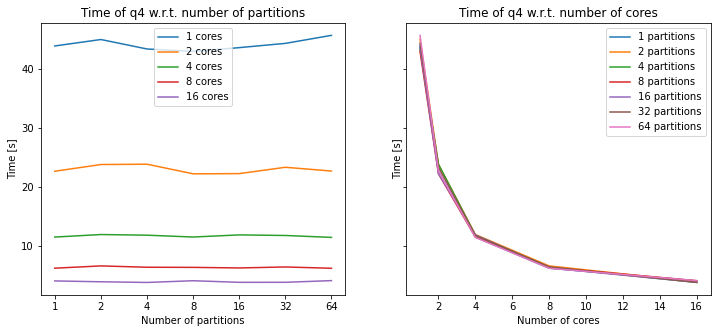

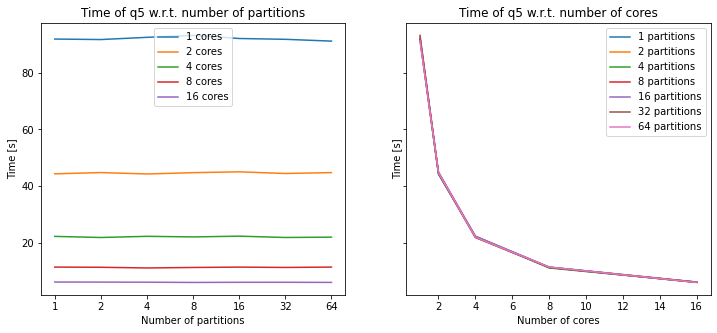

In [87]:
names = pd.Series(["q1", "q2", "q3", "q4","q5"])
date = "_21.4.2022"
filenames = names + date + ".csv"
for i in range(len(filenames)):
    df, partitions = load(filenames[i])
    plot_result(names[i], date, df, partitions,True)   